In [ ]:
# Data processing : Collect Finance stock price, add 'Variation', Clean data
# Data split on train_data and test_data then into X_train, y_train by batch_size

In [ ]:
# Install dependencies
!pip install yfinance

In [ ]:
# import Libs
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import yfinance as yf

# define ticker and start_data , end_date
ticker = "^GSPC"
start_date = "2021-01-01"
end_date = "2023-03-09"

#data = yf.download(tickers="AAPL", start="2020-01-01", end="2023-03-03") # or try for SPY :
data = yf.Ticker(ticker)
data = data.history(start=start_date, end=end_date)
print('-- Data Collected :' , data.shape)

# Adding 'Variation' Column
data['Variation'] = data['Close'] - data['Open']

# Adding shifted 'target_close' and 'target_var' column, 
data['Target_Close'] = data['Close'].shift(-1)
data['Target_Var'] = data['Variation'].shift(-1)

# Clean data empty cells 
data.dropna(inplace=True)

print('-- Data Processed :' , data.shape)
data.head()


-- Data Collected : (548, 7)
-- Data Processed : (547, 10)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Variation,Target_Close,Target_Var
Date,,,,,,,,,,
2021-01-04 00:00:00-05:00,3764.610107,3769.989990,3662.709961,3700.649902,5015000000,0.0,0.0,-63.960205,3726.860107,28.840088
2021-01-05 00:00:00-05:00,3698.020020,3737.830078,3695.070068,3726.860107,4591020000,0.0,0.0,28.840088,3748.139893,35.939941
2021-01-06 00:00:00-05:00,3712.199951,3783.040039,3705.340088,3748.139893,6064110000,0.0,0.0,35.939941,3803.790039,39.080078
2021-01-07 00:00:00-05:00,3764.709961,3811.550049,3764.709961,3803.790039,5099160000,0.0,0.0,39.080078,3824.679932,9.629883
2021-01-08 00:00:00-05:00,3815.050049,3826.689941,3783.600098,3824.679932,4773040000,0.0,0.0,9.629883,3799.610107,-3.529785


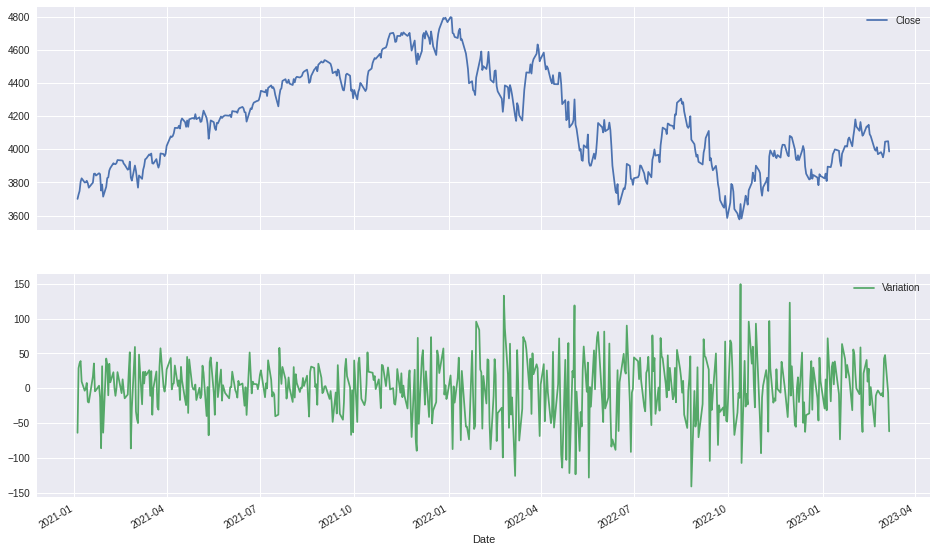

In [ ]:
# Define plot styles 
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [16, 10]
plt.rcParams['axes.grid'] = True

# Define features to plot
features = ['Close', 'Variation']
plot_features = data[features]
chart = plot_features.plot(subplots=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define the features of labels #features = ['Close', 'Volume', 'Variation']
features = ['Variation']
label = 'Target_Var'

n_features = len(features) # nbr of features

In [ ]:
# Select Final DataSet : 1 feature : 'Variation'
fdata = data[features]

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(fdata, test_size=0.2)
test_data.shape , train_data.shape

((110, 1), (437, 1))

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_train_data = scaler.fit_transform(train_data[features])
scaled_test_data = scaler.transform(test_data[features])

scaled_train_data.shape , scaled_test_data.shape

((437, 1), (110, 1))

In [ ]:
# Define batch size or the cycle of timeseries
batch_size = 10 

# Define the training and testing data
X_train = []
y_train = []
for i in range(batch_size, len(scaled_train_data)):
    X_train.append(scaled_train_data[i-batch_size:i])
    y_train.append(scaled_train_data[i])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(batch_size, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-batch_size:i])
    y_test.append(scaled_test_data[i])
X_test, y_test = np.array(X_test), np.array(y_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((427, 10, 1), (427, 1), (100, 10, 1), (100, 1))